<a href="https://colab.research.google.com/github/KaziTanvir/Tweet-Emotion-Recognition-using-LSTM/blob/main/Tweet_Emotion_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tweet Emotion Recognition: Natural Language Processing with TensorFlow

---

Dataset: [Tweet Emotion Dataset](https://github.com/dair-ai/emotion_dataset)



---

## Task 1: Introduction

## Task 2: Setup and Imports

1. Installing Hugging Face's nlp package
2. Importing libraries

In [1]:
!pip install nlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import nlp
import random


def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    
def show_confusion_matrix(y_true, y_pred, classes):
    from sklearn.metrics import confusion_matrix
    
    cm = confusion_matrix(y_true, y_pred, normalize='true')

    plt.figure(figsize=(8, 8))
    sp = plt.subplot(1, 1, 1)
    ctx = sp.matshow(cm)
    plt.xticks(list(range(0, 6)), labels=classes)
    plt.yticks(list(range(0, 6)), labels=classes)
    plt.colorbar(ctx)
    plt.show()

    
print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.8.2


## Task 3: Importing Data

1. Importing the Tweet Emotion dataset
2. Creating train, validation and test sets
3. Extracting tweets and labels from the examples

In [3]:
dataset = nlp.load_dataset('emotion')

In [4]:
dataset

{'train': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 16000),
 'validation': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 2000),
 'test': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 2000)}

In [5]:
train = dataset['train']
test = dataset['test']
val = dataset['validation']


In [6]:
def get_tweets(data):
  tweets = [x['text'] for x in data]
  labels = [x['label'] for x in data]
  return tweets , labels

In [7]:
tweets, labels = get_tweets(train)

In [8]:
tweets[10],labels[10]

('i feel like i have to make the suffering i m seeing mean something',
 'sadness')

## Task 4: Tokenizer

1. Tokenizing the tweets

In [9]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [10]:
tokenizer = Tokenizer(num_words = 10000, oov_token = '<UNK>')
tokenizer.fit_on_texts(tweets)  

In [11]:
tokenizer.texts_to_sequences([tweets[10]])

[[2, 3, 14, 2, 21, 5, 80, 6, 733, 2, 93, 544, 304, 84]]

In [12]:
tweets[10]

'i feel like i have to make the suffering i m seeing mean something'

## Task 5: Padding and Truncating Sequences

1. Checking length of the tweets
2. Creating padded sequences

(array([  8.,  45., 310., 488., 539., 625., 626., 629., 613., 636., 654.,
        655., 608., 622., 609., 603., 559., 535., 530., 510., 452., 430.,
        382., 385., 330., 327., 336., 317., 238., 208., 200., 200., 167.,
        157., 141., 144., 120., 117., 117.,  88.,  96.,  72.,  66.,  66.,
         65.,  52.,  37.,  43.,  30.,  32.,  31.,  26.,  30.,  20.,  23.,
         14.,   9.,  10.,   4.,   4.,   4.,   1.,   4.,   1.]),
 array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
        15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27.,
        28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40.,
        41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53.,
        54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64., 65., 66.]),
 <a list of 64 Patch objects>)

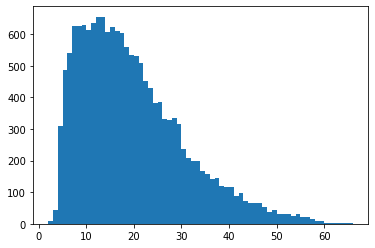

In [13]:
lengths = [len(t.split(' ')) for t in tweets]
plt.hist(lengths, bins = len(set(lengths)))

In [14]:
max_len = 60 

In [15]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [16]:
def get_squences(tokenizer, tweets):
  sqequences = tokenizer.texts_to_sequences(tweets)
  padded = pad_sequences(sqequences, truncating='post', padding = 'post',maxlen = max_len)
  return padded

In [17]:
pts = get_squences(tokenizer, tweets)

In [18]:
pts[10]

array([  2,   3,  14,   2,  21,   5,  80,   6, 733,   2,  93, 544, 304,
        84,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0], dtype=int32)

## Task 6: Preparing the Labels

1. Creating classes to index and index to classes dictionaries
2. Converting text labels to numeric labels

In [19]:
classes = set(labels)
print(classes)

{'surprise', 'joy', 'anger', 'love', 'sadness', 'fear'}


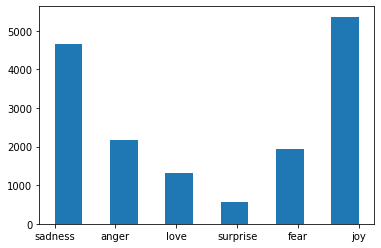

In [20]:
plt.hist(labels , bins=11)
plt.show()

In [21]:
class_to_index = dict((c,i) for i,c in enumerate(classes))
index_to_class = dict((v,k) for k,v in class_to_index.items())

In [22]:
class_to_index

{'surprise': 0, 'joy': 1, 'anger': 2, 'love': 3, 'sadness': 4, 'fear': 5}

In [23]:
index_to_class

{0: 'surprise', 1: 'joy', 2: 'anger', 3: 'love', 4: 'sadness', 5: 'fear'}

In [24]:
names_to_ids = lambda labels: np.array([class_to_index.get(x) for x in labels])

In [25]:
train_labels = names_to_ids(labels)
print(train_labels[10])

4


## Task 7: Creating the Model

1. Creating the model
2. Compiling the model

In [26]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(10000,16,input_length = max_len),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
    tf.keras.layers.Dense(6,activation='softmax')
])

model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)


In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 60, 16)            160000    
                                                                 
 bidirectional (Bidirectiona  (None, 60, 40)           5920      
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 40)               9760      
 nal)                                                            
                                                                 
 dense (Dense)               (None, 6)                 246       
                                                                 
Total params: 175,926
Trainable params: 175,926
Non-trainable params: 0
_________________________________________________________________


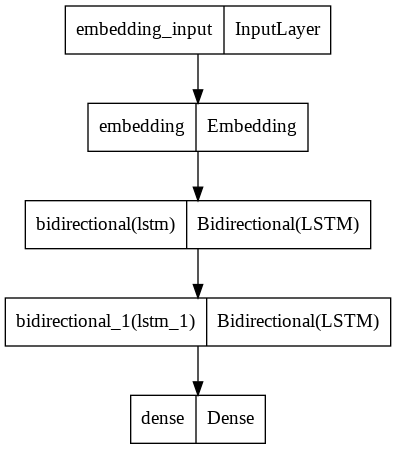

In [28]:
tf.keras.utils.plot_model(model)

## Task 8: Training the Model

1. Preparing a validation set
2. Training the model

In [29]:
val_tweets ,val_labels = get_tweets(val)
val_seq = get_squences(tokenizer,val_tweets)
val_labels = names_to_ids(val_labels)

In [30]:

h = model.fit(
    pts , train_labels,
    validation_data = (val_seq,val_labels),
    epochs =20,
    callbacks = [
        tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy', patience = 5)
    ]
    
)

Epoch 1/20
500/500 [==============================] - 20s 26ms/step - loss: 1.2803 - accuracy: 0.5088 - val_loss: 0.8047 - val_accuracy: 0.7315
Epoch 2/20
500/500 [==============================] - 7s 15ms/step - loss: 0.5416 - accuracy: 0.8234 - val_loss: 0.5766 - val_accuracy: 0.8150
Epoch 3/20
500/500 [==============================] - 7s 14ms/step - loss: 0.2926 - accuracy: 0.9053 - val_loss: 0.3993 - val_accuracy: 0.8720
Epoch 4/20
500/500 [==============================] - 7s 14ms/step - loss: 0.1926 - accuracy: 0.9398 - val_loss: 0.3671 - val_accuracy: 0.8785
Epoch 5/20
500/500 [==============================] - 7s 14ms/step - loss: 0.1388 - accuracy: 0.9589 - val_loss: 0.3896 - val_accuracy: 0.8825
Epoch 6/20
500/500 [==============================] - 7s 14ms/step - loss: 0.1172 - accuracy: 0.9639 - val_loss: 0.4134 - val_accuracy: 0.8745
Epoch 7/20
500/500 [==============================] - 7s 14ms/step - loss: 0.1017 - accuracy: 0.9679 - val_loss: 0.3751 - val_accuracy: 0.885

## Task 9: Evaluating the Model

1. Visualizing training history
2. Prepraring a test set
3. A look at individual predictions on the test set
4. A look at all predictions on the test set

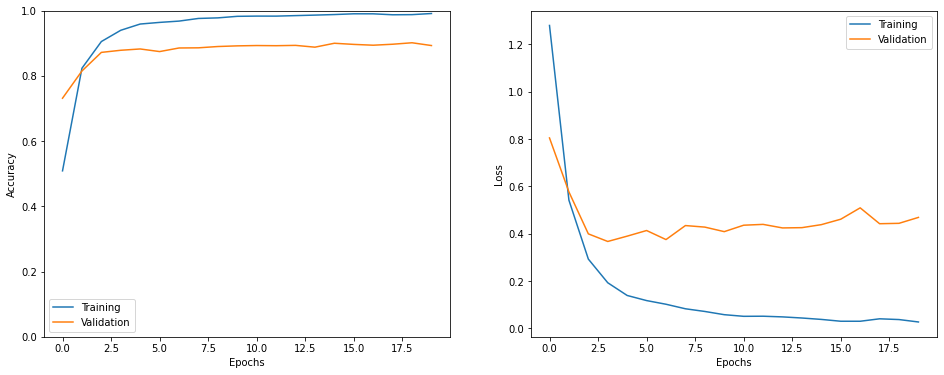

In [31]:
show_history(h)

In [33]:
test_tweets, test_labels = get_tweets(test)
test_seq = get_squences(tokenizer,test_tweets)
test_labels = names_to_ids(test_labels)

In [36]:
_ = model.evaluate(test_seq, test_labels)

63/63 [==============================] - 1s 8ms/step - loss: 0.5164 - accuracy: 0.8835


In [37]:
i = random.randint(0, len(test_labels)-1)

print('Sentence : ', test_tweets[i])
print('Emotion : ',index_to_class[test_labels[i]])

p = model.predict(np.expand_dims(test_seq[i],axis =0))[0]
pred_class = index_to_class[np.argmax(p).astype('uint8')]

print('Prediction Emotion : ',pred_class)

Sentence :  im thinking well i could be a bit smaller but for health reasons and i should see a doctor more regularly because im feeling crappy
Emotion :  sadness
Prediction Emotion :  sadness


In [38]:
i = random.randint(0, len(test_labels)-1)

print('Sentence : ', test_tweets[i])
print('Emotion : ',index_to_class[test_labels[i]])

p = model.predict(np.expand_dims(test_seq[i],axis =0))[0]
pred_class = index_to_class[np.argmax(p).astype('uint8')]

print('Prediction Emotion : ',pred_class)

Sentence :  i feel the presence of the divine with you when you are buried inside me smiling down at me your sweat dripping into my eager mouth
Emotion :  joy
Prediction Emotion :  joy


In [49]:
i = random.randint(0, len(test_labels)-1)

print('Sentence : ', test_tweets[i])
print('Emotion : ',index_to_class[test_labels[i]])

p = model.predict(np.expand_dims(test_seq[i],axis =0))[0]
pred_class = index_to_class[np.argmax(p).astype('uint8')]

print('Prediction Emotion : ',pred_class)

Sentence :  i am truly unfortunate the majority of the time i m usually drained but i obtain it hard to get from bed i really feel restless and others
Emotion :  fear
Prediction Emotion :  sadness


In [53]:
y_predict = np.argmax(model.predict(test_seq), axis=-1)

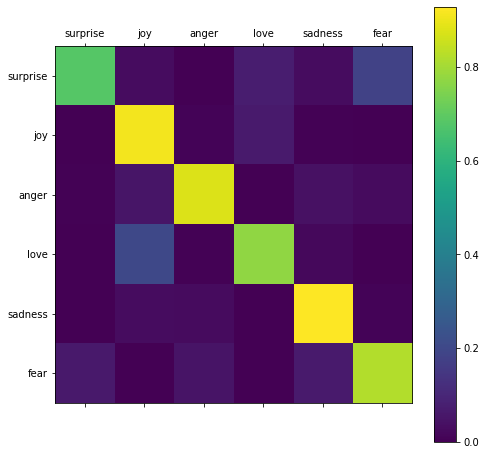

In [54]:
show_confusion_matrix(test_labels,y_predict, list(classes))